## UNDERSTANDING SEQUENTIAL MODEL'S RNN, LSTM & BASIC IMPLEMENTATION

In [53]:
#imports

#keras imports
from keras.models import Sequential, Model
from keras.layers import Embedding, SimpleRNN, Flatten, Input, Dense
from keras.layers import LSTM
from keras.datasets import imdb
from keras.preprocessing import sequence


# general imports
from IPython.display import display, Markdown #just to display markdown
import numpy as np
import cv2


# visualiaztion imports
%matplotlib inline
import matplotlib.pyplot as plt

In [54]:
display(Markdown("## UNDERSTANDING RECURRENT NEURAL NETWORKS"))

print ("""
RNN processes sequences by iterating through the sequence elements and maintaining 
a "state" containing information relative to what they have seen so far. 

Note: RNN is a loop

state_t = 0
for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t
    
""")

## UNDERSTANDING RECURRENT NEURAL NETWORKS


RNN processes sequences by iterating through the sequence elements and maintaining 
a "state" containing information relative to what they have seen so far. 

Note: RNN is a loop

state_t = 0
for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t
    



In [56]:
display(Markdown("## NUMPY IMPLEMENTATION OF RECURRENT NEURAL NETWORKS"))

timesteps = 100  # Number of timesteps in the input sequence
inputs_features = 32  # Dimensionality of the input feature space
output_features = 64  # Dimensionality of the output feature space


# This is our input data - just random noise for the sake of our example.
inputs = np.random.random((timesteps, inputs_features))
# This is our "initial state": an all-zero vector.
state_t = np.zeros((output_features,))



print ("Raw data\n")
print("Shape of input data: {}".format(inputs.shape))
print ("first 2 timestamps data \n{}\n".format(inputs[:2]))
print("Expected output shape/timestamp: {}".format(state_t.shape))
print ("Random initial output state \n{}\n".format(state_t))

# Creating random weight matrices
W = np.random.random((output_features, inputs_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:  # input_t is a vector of shape (input_features,)
    # We combine the input with the current state
    # (i.e. the previous output) to obtain the current output.
    
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    
    # We store this output in a list.
    successive_outputs.append(output_t)
    
    # We update the "state" of the network for the next timestep
    state_t = output_t
    


display(Markdown("### result"))

# The final output is a 2D tensor of shape (timesteps, output_features).
# final_output_sequence = np.concatenate(successive_outputs, axis=0)
final_output_sequence = np.reshape(successive_outputs, (timesteps,output_features))

print ("We have a {} dimension vector for each time-step of input sequence\n".format(final_output_sequence.shape[1]))
print (final_output_sequence)

print ("""
Note:

- RNN in each loop, produce result for that particular timestamp
- While in a loop, RNN has output from earlier states stored in the form of state variable
- This output corresponds is produced when "return sequence = True" in rnn parameter initialization
- The above input data is 1 sample in a batch (for next sample the loop restarts)
- The above implementation is the actual Keras SimpleRNN layer 
(the only difference is it can process batches of sequence)
""")

## NUMPY IMPLEMENTATION OF RECURRENT NEURAL NETWORKS

Raw data

Shape of input data: (100, 32)
first 2 timestamps data 
[[0.48289725 0.79108913 0.44088903 0.59517163 0.5158298  0.18947807
  0.9696553  0.58997603 0.24566132 0.77378157 0.92597146 0.81646709
  0.12235647 0.40460388 0.41895466 0.24150853 0.69586596 0.35183402
  0.72125591 0.51978534 0.11021748 0.95736806 0.7800522  0.22659342
  0.83492469 0.76039195 0.53003156 0.92050131 0.91170129 0.54865555
  0.53606984 0.05266964]
 [0.10679046 0.79882164 0.70268247 0.52583056 0.5447403  0.45776724
  0.5746902  0.42766651 0.16830358 0.39464999 0.9123413  0.31800375
  0.22843212 0.37199145 0.95400989 0.7587576  0.08987357 0.10226535
  0.73737846 0.08259114 0.23942355 0.37972868 0.39235584 0.82014792
  0.35934926 0.34147979 0.76685175 0.62567106 0.68326994 0.23836921
  0.02470884 0.81642602]]

Expected output shape/timestamp: (64,)
Random initial output state 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

### result

We have a 64 dimension vector for each time-step of input sequence

[[1.         0.99999999 1.         ... 0.99999995 0.99999999 1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]

Note:

- RNN in each loop, produce result for that particular timestamp
- While in a loop, RNN has output from earlier states stored in the form of state variable
- This output corresponds is produced when "return sequence = True" in rnn parameter initialization
- The above input data is 1 sample in a batch (for next sample the loop restarts)
- The above implementation is the actual Keras SimpleRNN layer 
(the only difference is it can process batches of sequence)



In [57]:
display(Markdown("## implementing above model using keras SimpleRNN layer"))

model = Sequential()
model.add(SimpleRNN(64,return_sequences=True,input_shape=(100,32),name="rnn_layer"))
model.summary()

print ("""
Note:
In case of text, the embedding layer help to create this 2 dimensional input vector. 
In text each word represent the timestamp and word vector is smallest data unit.
""")

## implementing above model using keras SimpleRNN layer

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rnn_layer (SimpleRNN)        (None, 100, 64)           6208      
Total params: 6,208
Trainable params: 6,208
Non-trainable params: 0
_________________________________________________________________

Note:
In case of text, the embedding layer help to create this 2 dimensional input vector. 
In text each word represent the timestamp and word vector is smallest data unit.



In [58]:
display(Markdown("## USING SIMPLE-RNN & RETURNING THE LAST STATE"))

#embedding layer initializations
n_vocab_embedding_layer = 10000
size_of_word_vector = 32

model = Sequential()
model.add(Embedding(n_vocab_embedding_layer, output_dim=size_of_word_vector , input_length=100,name="embedding_layer"))
model.add(SimpleRNN(64, name = "rnn_layer"))
model.summary()


display(Markdown("### USING SIMPLE-RNN & RETURNING ALL STATE's SEQUENCES"))

model = Sequential()
model.add(Embedding(n_vocab_embedding_layer, output_dim=size_of_word_vector, input_length=100,name="embedding_layer"))
model.add(SimpleRNN(64, return_sequences=True, name = "rnn_layer"))
model.summary()

print ("""
"return_sequences" parameter decides if the output is produced at each stage or final output is produced 
""")

## USING SIMPLE-RNN & RETURNING THE LAST STATE

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 100, 32)           320000    
_________________________________________________________________
rnn_layer (SimpleRNN)        (None, 64)                6208      
Total params: 326,208
Trainable params: 326,208
Non-trainable params: 0
_________________________________________________________________


### USING SIMPLE-RNN & RETURNING ALL STATE's SEQUENCES

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 100, 32)           320000    
_________________________________________________________________
rnn_layer (SimpleRNN)        (None, 100, 64)           6208      
Total params: 326,208
Trainable params: 326,208
Non-trainable params: 0
_________________________________________________________________

"return_sequences" parameter decides if the output is produced at each stage or final output is produced 



In [59]:
def plot_model_training_history(history,accuracy = True):
    
    #collecting all post-training values 
    if accuracy:
        acc = history.history['acc']
        val_acc = history.history['val_acc']
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    
    # ploting losses
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    
    plt.figure()
    
    if accuracy:
        # ploting accuracies
        plt.plot(epochs, acc, 'bo', label='Training acc')
        plt.plot(epochs, val_acc, 'b', label='Validation acc')
        plt.title('Training and validation accuracy')
        plt.legend()
    return

In [62]:
display(Markdown("## LOADING DATA FOR ALL THE BELOW MODEL "))

# pre-processing initializations
max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

# data pre-prcessing
### IMDB data preparation was extensively cover in "text_pre-processing_basic model_building"(earlier module) ###


print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# cutting sentences to max length of 500
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print ("after data preprocessing")
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape, "\n")

print("\nImdb review 1 sample input data\n")
print(input_train[:1]) 

print("\nImdb review data lables")
print(y_train[:2])
print(
"""
Note:  
0 : "Negative review"
1 : "Positive review"
post_padding in input data helps gragient in LSTM flow better 

"""
)

## LOADING DATA FOR ALL THE BELOW MODEL 

Loading data...
after data preprocessing
input_train shape: (25000, 500)
input_test shape: (25000, 500) 


Imdb review 1 sample input data

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  

## TRAINING MODEL USING SIMPLE-RNN LAYER 

Loading data...
after data preprocessing
input_train shape: (25000, 500)
input_test shape: (25000, 500) 


Imdb review data lables
[1 0]

Note:  
0 : "Negative review"
1 : "Positive review"


starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.6471 - acc: 0.6091 - val_loss: 0.5780 - val_acc: 

### result

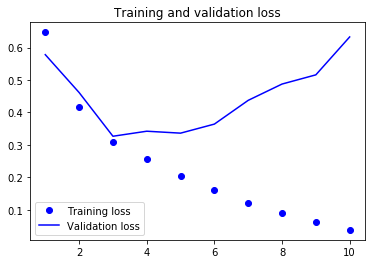

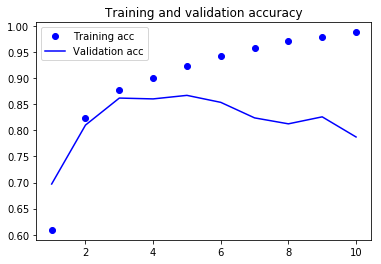

In [11]:
display(Markdown("## TRAINING MODEL USING SIMPLE-RNN LAYER "))

# model architecture and training
print("starting model training...")
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()
print ("\n")
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

# ploting model training results
display(Markdown("### result"))
plot_model_training_history(history)

In [63]:
display(Markdown("## UNDERSTANDING LONG SHORT TERM MEMORY (LSTM)"))
print ("""""")

## UNDERSTANDING LONG SHORT TERM MEMORY (LSTM)

In [ ]:
display(Markdown("## TRAINING A MODEL USING LSTM LAYER"))

# model architecture and training
print("starting model training...")
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()
print ("\n")

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

# ploting model training results
display(Markdown("### result"))
plot_model_training_history(history)

In [64]:
def plot_large_image_without_borders(path_to_image):
    # change the figure size
    fig2 = plt.figure(figsize = (15,15)) # create a 5 x 5 figure 
    ax3 = fig2.add_subplot(111)
    ax3.imshow(cv2.imread(path_to_image), interpolation='none')
    plt.axis('off')
    plt.show()

In [22]:
display(Markdown("## UNDERSTANDING BIDIRECTIONAL RNNs"))

display(Markdown("### reversing data for sequential model training"))

print ("""
Undertanding the results, if the data is feed in reverse manner. 
Which is the second input in bi-directional RNN layer.
""")

print ("Data reversing")
# Reverse sequences
input_train_ = [x[::-1] for x in input_train]
input_test_ = [x[::-1] for x in input_test]

# Pad sequences
x_train_ = sequence.pad_sequences(input_train_, maxlen=maxlen)
x_test_ = sequence.pad_sequences(input_test_, maxlen=maxlen)

# model architecture and training
print("starting model training...")
model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
print ("\n")

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train_, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

# ploting model training results
display(Markdown("### result"))
plot_model_training_history(history)

print ("""
Thus, remarkably, on such a text dataset, reversed-order processing works 
just as well as chronological processing
"""
)

### Using bidirectional RNNs

![title](bi-directional_rnn.png)

In [ ]:
display(Markdown("## TRAINING AND EVALUATING A BIDIRECTIONAL LSTM"))

# model architecture and training
print("starting model training...")
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
print ("\n")

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# ploting model training results
display(Markdown("### result"))
plot_model_training_history(history)

print ("""
It performs slightly better than the regular LSTM we tried in the previous section, 
going above 89% validation accuracy. It also seems to overfit faster, which is unsurprising 
since a bidirectional layer has twice more parameters than a chronological LSTM.
"""
)

## UNDERSTANDING SEQUENCE PROCESSING WITH CONVNETS"
![title](convnets.png)

In [ ]:
display(Markdown("### training and evaluating a simple 1D convnet"))

# model architecture and training
print("starting model training...")

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
print ("\n")

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

# ploting model training results
display(Markdown("### result"))
plot_model_training_history(history)

### COMBINING CNNs & RNNs FOR LONG SEQUENCES

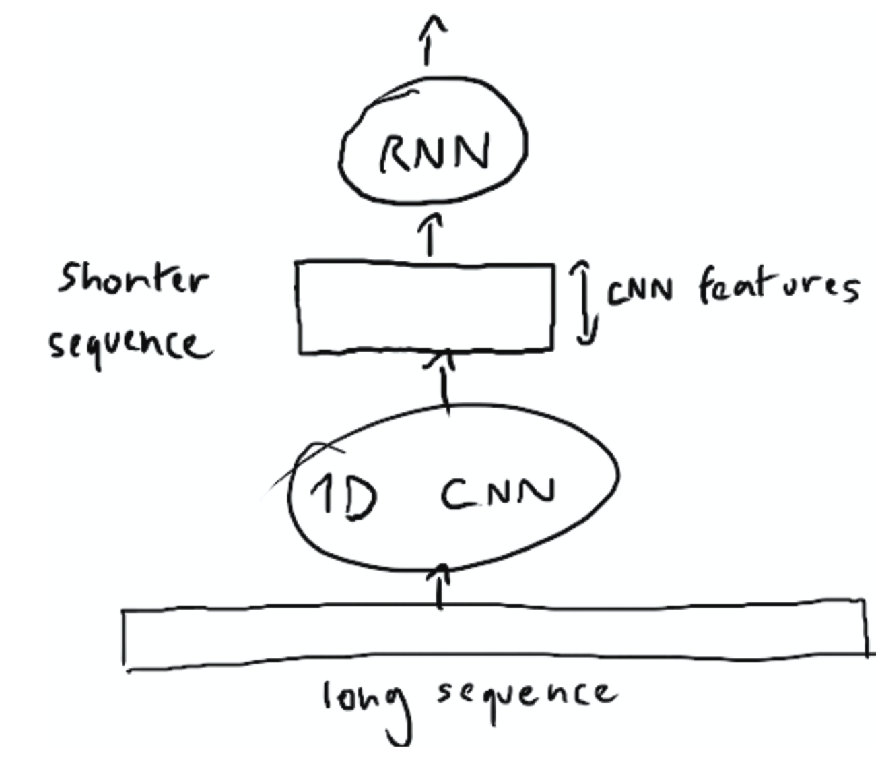

In [51]:
display(Markdown("### COMBINING CNNs & RNNs FOR LONG SEQUENCES"))
plot_large_image_without_borders(path_to_image="./combined_model.png")

In [ ]:
display(Markdown("### training 1D convnet with GRU"))

# model architecture and training
print("starting model training...")

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.summary()
print ("\n")

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

# ploting model training results
display(Markdown("### result"))
plot_model_training_history(history)